<a href="https://colab.research.google.com/github/redstar19sg/commando-forest/blob/main/Capstone_Project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [24]:
# Step 1: Load the dataset
file_path = "/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (1000, 14)


In [25]:
# Step 2: Preprocessing
# Replace serumcholestrol=0 with mean of non-zero values
df['serumcholestrol'] = df['serumcholestrol'].replace(0, df['serumcholestrol'][df['serumcholestrol'] != 0].mean())

In [26]:
# Encode categorical features
categorical_cols = ['chestpain', 'restingrelectro', 'slope', 'noofmajorvessels']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [27]:
# Standardize numerical features
numerical_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [28]:
# Create X by dropping patientid and target
X = df_encoded.drop(['patientid', 'target'], axis=1)
print("X created. Shape:", X.shape)

X created. Shape: (1000, 23)


In [29]:
# Step 3: K-means clustering to find optimal K
inertias = []
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X should now be defined
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

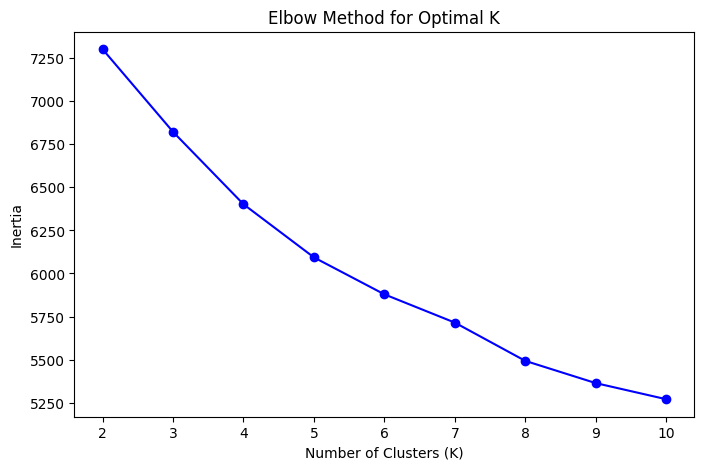

In [30]:
# Step 4: Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

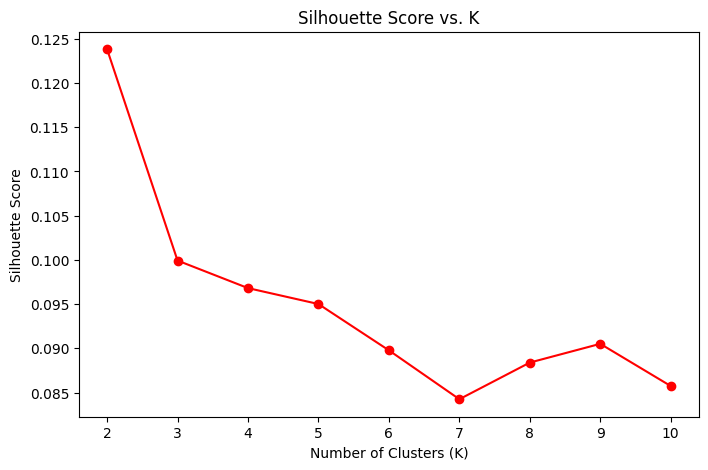

In [31]:
# Step 5: Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show()

In [32]:
# Step 6: Apply K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
print("K-means clustering completed with K=4. Cluster labels added to dataset.")

K-means clustering completed with K=4. Cluster labels added to dataset.


<ipython-input-33-9b257d48a364>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cluster_ages, labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])


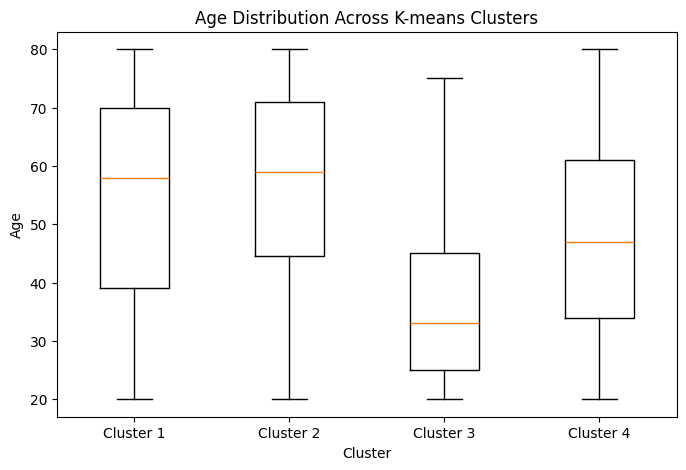

In [33]:
# Step 7: Visualize age distribution across clusters
cluster_ages = [df[df['cluster'] == i]['age'].tolist() for i in range(4)]
plt.figure(figsize=(8, 5))
plt.boxplot(cluster_ages, labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Age Distribution Across K-means Clusters')
plt.show()

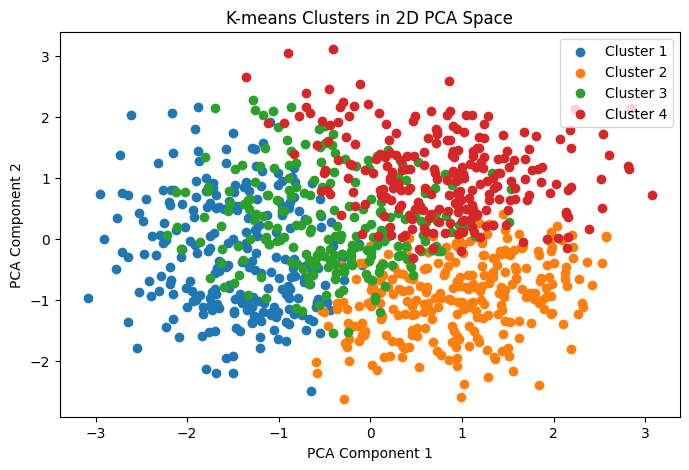

In [34]:
# Step 8: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 5))
for i in range(4):
    plt.scatter(X_pca[df['cluster'] == i, 0], X_pca[df['cluster'] == i, 1], label=f'Cluster {i+1}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clusters in 2D PCA Space')
plt.legend()
plt.show()

In [35]:
# Step 9: Silhouette score for K=4
sil_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score for K=4: {sil_score:.3f}")

Silhouette Score for K=4: 0.097


In [36]:
# Step 10: Summarize clusters
numerical_summary = df.groupby('cluster')[numerical_cols].mean()
categorical_summary = df.groupby('cluster')[['gender', 'fastingbloodsugar', 'exerciseangia'] + categorical_cols].agg(lambda x: x.mode()[0])
cluster_summary = pd.concat([numerical_summary, categorical_summary], axis=1)
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               age   restingBP  serumcholestrol  maxheartrate   oldpeak  \
cluster                                                                   
0        54.058824  127.898039       261.903961    112.949020  2.622353   
1        56.498182  172.541818       410.001482    145.458182  1.700000   
2        36.466667  141.475556       290.392923    169.333333  1.814222   
3        47.816327  162.661224       342.870133    157.444898  4.748163   

         gender  fastingbloodsugar  exerciseangia  chestpain  restingrelectro  \
cluster                                                                         
0             1                  0              1          0                0   
1             1                  0              0          2                1   
2             1                  0              1          0                0   
3             1                  0              0          2                1   

         slope  noofmajorvessels  
cluster  

In [37]:
# Step 11: Save the dataset with cluster labels
df.to_csv('Cardiovascular_Disease_Dataset_with_Clusters.csv', index=False)
print("Dataset with cluster labels saved as 'Cardiovascular_Disease_Dataset_with_Clusters.csv'")

Dataset with cluster labels saved as 'Cardiovascular_Disease_Dataset_with_Clusters.csv'
